# Linear Regression

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" style="height:250px">

Today we will be going over simple linear regression


- A linear regression is a line of best fit 
- A line of best fit has a correlation coefficient R^2.

# 1) Packages 

Let's first import all of the packages we need for this assignment. 


- [numpy](https://numpy.org/) helps us make our training and test set arrays

- [sklearn](https://scikit-learn.org/stable/index.html) helps us use the logistic regression function

- [tensorflow](https://www.tensorflow.org/) is what we will use to build our neural networks 

- [keras](https://keras.io/) helps us to make our neural networks 



In [3]:
#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import cv2
from pytube import YouTube
import math
import sklearn

# 2) Import Data

- Today we will be working with data from the Boston Housing Market 
- we will be working with inputs like crime rate, location, etc, to find the target
- There are 13 features per house
- The target is the median home price in ($ k) 

In [4]:
from keras.datasets import boston_housing
(train_data, train_price) , (test_data, test_price) = boston_housing.load_data()

Using TensorFlow backend.


# 3) Take a look at the data 

We have 404 houses in our training set 
We have 102 houses in our test set 

In [5]:
print(f'Training Data : {train_data.shape}')
print(f'Test Data: {test_data.shape}')

Training Data : (404, 13)
Test Data: (102, 13)


# 4) Normalize the data by computing the z score 

Only normalize the mean and standard deviation of the training data 


In [6]:
mean = train_data.mean(axis = 0)
train_data -= mean
sigma = train_data.std(axis = 0)
train_data /= sigma

test_data -= mean 
test_data /= sigma

# 5) Build the multiple linear regression model 

This is a multiple regression, so there will be multiple inputs

<img src="https://www.mathworks.com/help/examples/stats/win64/EstimateMultipleLinearRegressionCoefficientsExample_01.png" style = height:200px>

In [7]:
from keras import models
from keras import layers

def buildLinearRegression():
    
    model = models.Sequential([
    
    layers.Dense(1, activation='linear', input_shape=(train_data.shape[1],))
        
    ])
    
    model.compile(optimizer = 'rmsprop' , loss = 'mse', metrics = ['mae'])
        
    
    
    return model

# 6) Train the model 

In [8]:
linearModel = buildLinearRegression()

n_epochs = 10000

linearModel.fit(train_data, train_price, epochs = n_epochs, batch_size = 32, verbose = 0)

test_mse, test_mae = linearModel.evaluate(test_data, test_price, verbose = 0)

print(f'Model Mean Sqaured Error: {test_mse}')
print(f'Model Mean Average Error Value: {test_mae}')

Model Mean Sqaured Error: 23.02216728060853
Model Mean Average Error Value: 3.449336290359497


# 7) Test the model 

In [9]:
predictions = linearModel.predict(test_data)

# 8) Get weights and bias 

In [10]:
Weights = linearModel.layers[0].get_weights()[0]
Bias = linearModel.layers[0].get_weights()[1]

# 9) Plotting two features 

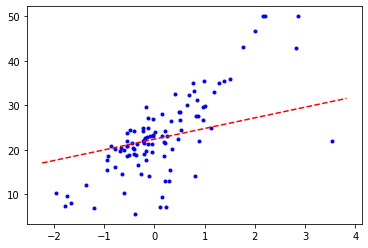

In [11]:
import matplotlib.pyplot as plt

idx = 5

x = test_data[:, np.newaxis, idx]

y = test_price


def bestFitLine(m, b):
   
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals =  m * x_vals + b
    plt.plot(x_vals, y_vals, '--', color = 'red')


plt.figure()
plt.scatter(x, y, marker = '.', color = 'blue')

bestFitLine(Weights[idx], Bias)


# Now it's your turn!

We will be comparing the differences in linear and logistic regression on the same data set. 

In [22]:
#We have to modify the data to make it categorical

maxtrain = np.amax(train_price)
maxtest = np.amax(test_price)

for i in range(len(train_price)):
    if(train_price[i] < maxtrain/2):
        train_price[i] = 0;
    else:
        train_price[i] = 1
    
    
    
for i in range(len(test_price)):
    if(test_price[i] < maxtest/2):
        test_price[i]= 0;
        
    else:
        test_price[i] = 1
    

In [23]:
# Define the logistic model here

from sklearn.linear_model import LogisticRegression


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


# Keep in mind the scoring metrics we will be using. 

# Train the model

In [24]:
# Train the model here

logisticRegr.fit(train_data, train_price)

C:\Users\coder\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Test the model on the data

In [25]:
# Test model here
logistic_predictions = logisticRegr.predict(test_data)
logistic_score = logisticRegr.score(test_data, test_price)
print(logistic_score)


0.8921568627450981


# Get weights and compare them with thsose of the linear regression

In [26]:
# Get weights 
logisticRegr.coef_

#Compre linear and logistic regression by printing the weight arrays

print("Linear weights:")
print(Weights)

print("Logistic weights:")
print(logisticRegr.coef_)

Linear weights:
[[-1.1109653 ]
 [ 1.3438065 ]
 [ 0.03124908]
 [ 0.9601239 ]
 [-2.372176  ]
 [ 2.3962164 ]
 [ 0.21242434]
 [-3.453772  ]
 [ 2.8981006 ]
 [-1.9676172 ]
 [-1.9720079 ]
 [ 0.83178866]
 [-4.0405097 ]]
Logistic weights:
[[-0.15257395  0.30051083 -0.46654762  0.31413753 -0.20023763  1.33839839
  -0.30362151 -1.10942773  1.53482915 -0.71457512 -0.41799184  0.16843306
  -2.47917009]]


# Plot the line of best fit of a logistic regression on two features


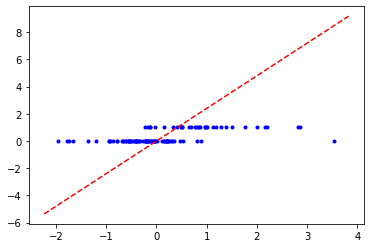

In [28]:
# Plot line here

def bestFitLine(m):
   
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals =  m * x_vals 
    plt.plot(x_vals, y_vals, '--', color = 'red')


plt.figure()
plt.scatter(x, y, marker = '.', color = 'blue')

bestFitLine(Weights[idx])

# Resources

https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras